# Python Project Report

## <font color = red> Introduction
The Global Economy contracted sharply with the **COVID-19 pandemic**, leading heavily to a recession in most countries. Governments across the world were facing a health, social and economic crisis. Markets were hitting new lows; trades were on a halt and the population was in a panic while hospitals were overwhelmed. It was up to the government and financial institutions to roll out fiscal measures to combat the pandemic and protect the people. <br> <br>

Elliott Harris, the UN Chief Economist, and the Assistant Secretary-General for Economic Development stated that "The pace and strength of the recovery of the crisis not only hinges on the efficacy of public health measures in slowing the spread of the virus but also on the ability of countries to protect jobs and incomes, particularly of the most vulnerable members of our societies.” <br> <br>
Source: Department of Economic and Social Affairs. (n.d.). _Covid-19 to slash global economic output by $8.5 trillion over next two years._ United Nations. Retrieved December 2, 2022, from https://www.un.org/en/desa/covid-19-slash-global-economic-output-85-trillion-over-next-two-years


## <font color = red> Objective
    
For this project, we will be analyzing the different types of fiscal policy measures taken across countries to tackle the pandemic. Based on the types of policies taken by the **best-performing countries**^, we will recommend policy measures to the **worst-performing countries**^^. <br><br>
 
To achieve this, we will be analyzing data to find the best and the worst-performing countries. This will narrow the search down to the top 10 and bottom 10 countries in terms of GDP percentage change. We will see analyses majorly on each country's income level, policy implementation authority, and types of policy measures. This data would help us recommend the type of policy measures the worst-performing countries should have taken to tackle the Great Lockdown better. <br><br>

^Countries with the highest percentage change in 2020-2021 GDP as **best-performing countries**.<br>
^^Countries with the worst percentage change in 2020-2021 GDP as **worst-performing countries.**
    
## <font color = red> Dataset
    
Our analysis was done by merging two datasets:
 
1. "COVID-19 Finance Starter EDA" hosted by Bojan Tunguz in CSV format. The dataset consists of nearly 4000 rows with data on different policy measures taken by 157 countries.
2. Annual GDP for every country in the world by the World Bank in CSV format.
 
The datasets contain the following attributes:
- **COVID-19 Finance Starter EDA**
    - Country Name
    - ID
    - Country ISO3
    - Income Level
    - Authority
    - Date
    - Level 1 policy measures
    - Level 2 policy measures
    - Level 3 policy measures
    - Details of the measure
    - Reference
    - Termination Date
    - Modification of Parent measure
    - Parent Measure

- **Annual GDP by the World Bank**
    - Country Name
    - Country Code
    - Indicator Name
    - Indicator Code
    - Year-wise GDP
    
### <font color = red> Questions:
Before we started, we had these questions:
<br>
**1. How did the GDP change in countries around the world before and during the pandemic?**
    
**2. All countries went into losses but who was hit the worst?**
    
**3. What steps were taken by the best performing countries to improve this economic situation?**
    
**4. What policy measures taken by the better-performing countries can be suggested to the worst-performing countries?**
    
**5. Are there low-income countries that performed relatively well in terms of increase in GDP?**
    
Our analysis was done by merging two datasets:
 
1. "COVID-19 Finance Starter EDA" hosted by Bojan Tunguz in CSV format. The dataset consists of nearly 4000 rows with data on different policy measures taken by 157 countries.
2. Annual GDP for every country in the world by the World Bank in CSV format.
 
The datasets contain the following attributes:
- **COVID-19 Finance Starter EDA**
    - Country Name
    - ID
    - Country ISO3
    - Income Level
    - Authority
    - Date
    - Level 1 policy measures
    - Level 2 policy measures
    - Level 3 policy measures
    - Details of the measure
    - Reference
    - Termination Date
    - Modification of Parent measure
    - Parent Measure

- **Annual GDP by the World Bank**
    - Country Name
    - Country Code
    - Indicator Name
    - Indicator Code
    - Year-wise GDP

## <font color = red> Choice for Heavier Grading: Data Analysis

In this analysis, multiple datasets are used, including the Covid Database, which consists primarily of categorical variables such as Policy Measures Implemented at multiple levels and their description, Income Levels of Countries, Financial Authorities, and World Bank Databases that contain mainly numerical variables such as GDP of countries across different years. Using the merged dataset, we have processed the categorical variables to perform the analysis. With the help of created interactive visualizations, we have been able to clearly understand the trend and provide all the answers that we were seeking. Moreover, we have applied the domain knowledge (financial) to better analyze the data. Based on our analysis and domain application, we were able to draw very clear inferences and recommendations which answered all of our questions.

## <font color = red> Data Processing

**Data Processing Tasks:**
<br>    
- Data Collection:
    - Load 2 datasets consisting of Policy Measures Data Implemented due to Pandemic COVID and data consiting of GDP of every country
    - Clean Covid Dataset's column 
    - Country ISO3 for merging the dataset
    - Filter GDP dataset. As we require only the data pre,during and post covid, we will only need 2018,2019,2020,2021 GDP columns
    - Create a dataframe consisting of only NaN values observed in GDP Dataset
    - Filter Covid Dataset using the dataframe with NaN values
<br>    
- Date Merging:
    - Merge GDP dataset and COVID dataset using Country ISO3 code as the joining parameter
<br>
- Data Preparation:
    - Filter column names of the merged dataset using the columns required for further analysis
    - Reorder columns
<br>
- Data Cleaning:
    - Country Name - Remove White Space, Drop Invalid countries
    - Authority - Remove White Space, Replace NaN values with `No Information available`, Replace all the abbreviations with Full Form
    - Date - Rename to Implementation Date, Convert to Date Time format, Extract Year and Year/Month of implementation
    - Level 1 policy measures - Remove White Space
    - Level 2 policy measures - Remove White Space
    - Termination Date - Extract Year and Year/Month of termination
    - Policy Modifications - Remove White Space, Replace observations with relevant strings  
    

In [1]:
#Importing required libraries for our data analysis and visualization

import pandas as pd
import datetime as dt
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### <font color=orange> Data Collection
We read the data into multiple dataframes from excel files, to proceed with the data merging and cleaning tasks.

In [2]:
#Defining generic path for the datasets
path = ''

#Loading both the datasets i.e. covid financial data and worldbank database
#Setting Country Name as the index for further merging process
#Skipping first 4 blank rows in world bank database

covid_db = pd.read_csv(path + 'covid-fci-data.csv' , index_col='Country Name', encoding = "ISO-8859-1", skipinitialspace = True)
worldbank_db = pd.read_csv(path + 'worldbank_db.csv', index_col='Country Name', skiprows = 4, skipinitialspace = True)

In [3]:
#Printing first 5 observations of the covid database
covid_db.head()

,ID,Country ISO3,Income Level,Authority,Date,Level 1 policy measures,Level 2 policy measures,Level 3 policy measures,Details of the measure,Reference,Termination Date,Modification of Parent Measure,Parent Measure
Country Name,,,,,,,,,,,,,
China,1,CHN,Upper middle income,SUP,2/1/20,Banking sector,Operational continuity ...,Blank ...,Require banks and insurance companies to ensur...,http://www.gov.cn/zhengce/zhengceku/2020-02/03...,NaN,No,NaN
Canada,2,CAN,High income,CB,3/13/20,Liquidity/funding,Liquidity (incl FX)/ELA ...,Blank ...,BoC also created a Bankers Acceptance Purchase...,https://www.bankofcanada.ca/markets/market-ope...,10/31/20,No,NaN
China,3,CHN,Upper middle income,CB,2/5/20,Banking sector,Integrity ...,Other integrity ...,The PBC has issued Notices on AML/CFT requirem...,NaN,NaN,No,NaN
Thailand,4,THA,Upper middle income,CB,2/5/20,Liquidity/funding,Policy rate ...,Blank ...,BOT cut its benchmark interest rate by 25 basi...,https://www.bot.or.th/English/PressandSpeeches...,NaN,No,NaN
Russian Federation,5,RUS,Upper middle income,CB,2/7/20,Liquidity/funding,Policy rate ...,Blank ...,Policy rates were reduced by 25 basis points t...,https://www.cnbc.com/2020/02/07/reuters-americ...,NaN,No,NaN


In [4]:
#Printing first 5 observations of worldbank database
worldbank_db.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN,NaN
Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,...,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12,NaN
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN
Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,...,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11,NaN
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10,NaN


In [5]:
#Renaming White Space from Country ISO3 code
covid_db['Country ISO3']=covid_db['Country ISO3'].str.strip()

In [6]:
#Fitlering the data as we only require only pre, during and post covid years for our analysis
gdp_db=worldbank_db[['Country Code','Indicator Name','Indicator Code','2018','2019','2020','2021']]
gdp_db

,Country Code,Indicator Name,Indicator Code,2018,2019,2020,2021
Country Name,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,3.202235e+09,3.310056e+09,2.496648e+09,NaN
Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1.805323e+10,1.879945e+10,2.011614e+10,NaN
Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
...,...,...,...,...,...,...,...
Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,7.878509e+09,7.899879e+09,7.716925e+09,9.007159e+09
"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2.160616e+10,2.188761e+10,1.884051e+10,2.106169e+10
South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,4.048421e+11,3.879346e+11,3.354421e+11,4.199464e+11


In [7]:
#Exception handling for chained assignment warning
pd.set_option("mode.chained_assignment",None)

In [8]:
#Getting observations with NaN values in gdp data
na_observations=gdp_db[gdp_db.isna().any(axis=1)]
#Dropping the observations with NaN values
gdp_db.dropna(inplace=True)
#Renaming the Country Code Column for further merging
gdp_db=gdp_db.rename(columns={'Country Code':'Country ISO3'})
gdp_db

,Country ISO3,Indicator Name,Indicator Code,2018,2019,2020,2021
Country Name,,,,,,,
Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1.515643e+10,1.540183e+10,1.513187e+10,1.826004e+10
Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,3.218420e+09,3.155149e+09,2.891001e+09,3.329911e+09
...,...,...,...,...,...,...,...
Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,7.878509e+09,7.899879e+09,7.716925e+09,9.007159e+09
"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2.160616e+10,2.188761e+10,1.884051e+10,2.106169e+10
South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,4.048421e+11,3.879346e+11,3.354421e+11,4.199464e+11


In [9]:
#Priniting the observations of GDP data with NaN values
na_observations

,Country Code,Indicator Name,Indicator Code,2018,2019,2020,2021
Country Name,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,3.202235e+09,3.310056e+09,2.496648e+09,NaN
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1.805323e+10,1.879945e+10,2.011614e+10,NaN
United Arab Emirates,ARE,GDP (current US$),NY.GDP.MKTP.CD,4.222150e+11,4.172156e+11,3.588688e+11,NaN
American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,6.390000e+08,6.480000e+08,7.090000e+08,NaN
Bhutan,BTN,GDP (current US$),NY.GDP.MKTP.CD,2.446866e+09,2.535657e+09,2.315436e+09,NaN
Channel Islands,CHI,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN
Cuba,CUB,GDP (current US$),NY.GDP.MKTP.CD,1.000500e+11,1.034280e+11,1.073520e+11,NaN
Curacao,CUW,GDP (current US$),NY.GDP.MKTP.CD,3.020389e+09,2.995185e+09,2.496175e+09,NaN
Cayman Islands,CYM,GDP (current US$),NY.GDP.MKTP.CD,5.530378e+09,5.943589e+09,5.608989e+09,NaN


In [10]:
#Resetting the index of Covid Database so that the Country Name is a column for cleaning
covid_db.reset_index(inplace=True)
#Filtering the covid database by removing the countries which have corresponding NaN values in GDP data
covid_db=covid_db[~covid_db['Country ISO3'].isin(na_observations.index)]
covid_db

,Country Name,ID,Country ISO3,Income Level,Authority,Date,Level 1 policy measures,Level 2 policy measures,Level 3 policy measures,Details of the measure,Reference,Termination Date,Modification of Parent Measure,Parent Measure
0,China,1,CHN,Upper middle income,SUP,2/1/20,Banking sector,Operational continuity ...,Blank ...,Require banks and insurance companies to ensur...,http://www.gov.cn/zhengce/zhengceku/2020-02/03...,NaN,No,NaN
1,Canada,2,CAN,High income,CB,3/13/20,Liquidity/funding,Liquidity (incl FX)/ELA ...,Blank ...,BoC also created a Bankers Acceptance Purchase...,https://www.bankofcanada.ca/markets/market-ope...,10/31/20,No,NaN
2,China,3,CHN,Upper middle income,CB,2/5/20,Banking sector,Integrity ...,Other integrity ...,The PBC has issued Notices on AML/CFT requirem...,NaN,NaN,No,NaN
3,Thailand,4,THA,Upper middle income,CB,2/5/20,Liquidity/funding,Policy rate ...,Blank ...,BOT cut its benchmark interest rate by 25 basi...,https://www.bot.or.th/English/PressandSpeeches...,NaN,No,NaN
4,Russian Federation,5,RUS,Upper middle income,CB,2/7/20,Liquidity/funding,Policy rate ...,Blank ...,Policy rates were reduced by 25 basis points t...,https://www.cnbc.com/2020/02/07/reuters-americ...,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,Guinea-Bissau,1338,GNB,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Free payment of water and electricity bill...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN
3719,Mali,1338,MLI,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Free payment of water and electricity bill...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN
3720,Niger,1338,NER,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Free payment of water and electricity bill...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN
3721,Senegal,1338,SEN,Lower middle income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Free payment of water and electricity bill...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN


### <font color=red>Data Merging
We combine the two datasets so that we can use the data together, and perform further preparation tasks. We connect the two databases on the common `Country ISO3 Code` columns.

In [11]:
#Merging Covid Database and GDP database by inner joining on Country Name
merged_data=pd.merge(covid_db,gdp_db,how='inner',on='Country ISO3')
merged_data

,Country Name,ID,Country ISO3,Income Level,Authority,Date,Level 1 policy measures,Level 2 policy measures,Level 3 policy measures,Details of the measure,Reference,Termination Date,Modification of Parent Measure,Parent Measure,Indicator Name,Indicator Code,2018,2019,2020,2021
0,China,1,CHN,Upper middle income,SUP,2/1/20,Banking sector,Operational continuity ...,Blank ...,Require banks and insurance companies to ensur...,http://www.gov.cn/zhengce/zhengceku/2020-02/03...,NaN,No,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
1,China,3,CHN,Upper middle income,CB,2/5/20,Banking sector,Integrity ...,Other integrity ...,The PBC has issued Notices on AML/CFT requirem...,NaN,NaN,No,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
2,China,9,CHN,Upper middle income,CB,2/17/20,Liquidity/funding,Policy rate ...,Blank ...,Medium-term lending facility (MLF) rate cut by...,https://www.reuters.com/article/us-china-econo...,NaN,No,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
3,China,73,CHN,Upper middle income,SUP,3/3/20,Financial Markets/NBFI,NBFI ...,Insurance ...,Commercial insurance companies will be support...,https://www.china-briefing.com/news/china-covi...,NaN,No,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
4,China,188,CHN,Upper middle income,CB,3/16/20,Liquidity/funding,Liquidity (incl FX)/ELA ...,Blank ...,Reduce the RRR rate for certain qualified bank...,NaN,NaN,No,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,Niger,1334,NER,Low income,CB,4/3/20,Payment systems,Easing regulatory requirements ...,Blank ...,Relaxation of requirements for opening electro...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10
3630,Niger,1335,NER,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,Reduction of 50% on ATM fees on the GIM-UEMOA ...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10
3631,Niger,1336,NER,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,Free mobile money transactions for amounts les...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10
3632,Niger,1337,NER,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Reduction of 50% on fees paid by the merch...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10


### <font color=orange> Data Preparation
We prepare the data by choosing only columns relevant to our analysis. We will be cleaning the data by removing a few data columns and keeping those which will be useful for our analysis.

In [12]:
#Defining a list with the relevant columns for analysis and cleaning
cols=['Country Name','Country ISO3','Income Level','Authority', 'Date', 'Level 1 policy measures','Level 2 policy measures', 'Level 3 policy measures', 'Details of the measure', 'Modification of Parent Measure', 'Termination Date', 'Indicator Name','2018', '2019','2020','2021']
merged_data=merged_data[cols]
merged_data

,Country Name,Country ISO3,Income Level,Authority,Date,Level 1 policy measures,Level 2 policy measures,Level 3 policy measures,Details of the measure,Modification of Parent Measure,Termination Date,Indicator Name,2018,2019,2020,2021
0,China,CHN,Upper middle income,SUP,2/1/20,Banking sector,Operational continuity ...,Blank ...,Require banks and insurance companies to ensur...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
1,China,CHN,Upper middle income,CB,2/5/20,Banking sector,Integrity ...,Other integrity ...,The PBC has issued Notices on AML/CFT requirem...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
2,China,CHN,Upper middle income,CB,2/17/20,Liquidity/funding,Policy rate ...,Blank ...,Medium-term lending facility (MLF) rate cut by...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
3,China,CHN,Upper middle income,SUP,3/3/20,Financial Markets/NBFI,NBFI ...,Insurance ...,Commercial insurance companies will be support...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
4,China,CHN,Upper middle income,CB,3/16/20,Liquidity/funding,Liquidity (incl FX)/ELA ...,Blank ...,Reduce the RRR rate for certain qualified bank...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,Niger,NER,Low income,CB,4/3/20,Payment systems,Easing regulatory requirements ...,Blank ...,Relaxation of requirements for opening electro...,No,NaN,GDP (current US$),1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10
3630,Niger,NER,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,Reduction of 50% on ATM fees on the GIM-UEMOA ...,No,NaN,GDP (current US$),1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10
3631,Niger,NER,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,Free mobile money transactions for amounts les...,No,NaN,GDP (current US$),1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10
3632,Niger,NER,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Reduction of 50% on fees paid by the merch...,No,NaN,GDP (current US$),1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10


In [13]:
#renaming the columns.
merged_data.rename(columns={'Country ISO3':'Country Code','Date':'Policy Implementation Date','Details of the measure':' Policy Implementation Details','Modification of Parent Measure':'Policy Modifications','Termination Date': 'Policy Termination Date'}, inplace=True)
merged_data.head()

,Country Name,Country Code,Income Level,Authority,Policy Implementation Date,Level 1 policy measures,Level 2 policy measures,Level 3 policy measures,Policy Implementation Details,Policy Modifications,Policy Termination Date,Indicator Name,2018,2019,2020,2021
0,China,CHN,Upper middle income,SUP,2/1/20,Banking sector,Operational continuity ...,Blank ...,Require banks and insurance companies to ensur...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
1,China,CHN,Upper middle income,CB,2/5/20,Banking sector,Integrity ...,Other integrity ...,The PBC has issued Notices on AML/CFT requirem...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
2,China,CHN,Upper middle income,CB,2/17/20,Liquidity/funding,Policy rate ...,Blank ...,Medium-term lending facility (MLF) rate cut by...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
3,China,CHN,Upper middle income,SUP,3/3/20,Financial Markets/NBFI,NBFI ...,Insurance ...,Commercial insurance companies will be support...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
4,China,CHN,Upper middle income,CB,3/16/20,Liquidity/funding,Liquidity (incl FX)/ELA ...,Blank ...,Reduce the RRR rate for certain qualified bank...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13


### <font color = red> Data Cleaning
After collecting, preparing, and merging the data, we need to clean the data as it includes a lot of `dirty data` and other quality issues.

In [14]:
#Removing blank spaces in the country name
covid_db['Country Name']=covid_db['Country Name'].str.strip()
covid_db

,Country Name,ID,Country ISO3,Income Level,Authority,Date,Level 1 policy measures,Level 2 policy measures,Level 3 policy measures,Details of the measure,Reference,Termination Date,Modification of Parent Measure,Parent Measure
0,China,1,CHN,Upper middle income,SUP,2/1/20,Banking sector,Operational continuity ...,Blank ...,Require banks and insurance companies to ensur...,http://www.gov.cn/zhengce/zhengceku/2020-02/03...,NaN,No,NaN
1,Canada,2,CAN,High income,CB,3/13/20,Liquidity/funding,Liquidity (incl FX)/ELA ...,Blank ...,BoC also created a Bankers Acceptance Purchase...,https://www.bankofcanada.ca/markets/market-ope...,10/31/20,No,NaN
2,China,3,CHN,Upper middle income,CB,2/5/20,Banking sector,Integrity ...,Other integrity ...,The PBC has issued Notices on AML/CFT requirem...,NaN,NaN,No,NaN
3,Thailand,4,THA,Upper middle income,CB,2/5/20,Liquidity/funding,Policy rate ...,Blank ...,BOT cut its benchmark interest rate by 25 basi...,https://www.bot.or.th/English/PressandSpeeches...,NaN,No,NaN
4,Russian Federation,5,RUS,Upper middle income,CB,2/7/20,Liquidity/funding,Policy rate ...,Blank ...,Policy rates were reduced by 25 basis points t...,https://www.cnbc.com/2020/02/07/reuters-americ...,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,Guinea-Bissau,1338,GNB,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Free payment of water and electricity bill...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN
3719,Mali,1338,MLI,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Free payment of water and electricity bill...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN
3720,Niger,1338,NER,Low income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Free payment of water and electricity bill...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN
3721,Senegal,1338,SEN,Lower middle income,CB,4/3/20,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Free payment of water and electricity bill...,https://www.bceao.int/fr/communique-presse/com...,NaN,No,NaN


#### Replacing abbrevations with full form

 
### Authority Abbreviations
1. CB - Central Bank
2. GOV - Government
3. MoF - Ministry of Finance
4. RES - Resolution Authority
5. SUP - Supervisory Agencies

In [15]:
#remove white spaces from the column to rename
merged_data['Authority'] = merged_data['Authority'].str.strip()

#replacing blank values
merged_data['Authority'] = merged_data['Authority'].replace(r'^\s*$', np.nan, regex=True).fillna('No Information Available')

#Replacing abbreviations with full form for better understanding
merged_data['Authority'] = merged_data['Authority'].replace(['CB','GOV','MoF','RES','SUP'],['Central Bank','Goverment','Ministry Of Finance','Resolution Authority','Supervisory Agencies'])
merged_data.head()

,Country Name,Country Code,Income Level,Authority,Policy Implementation Date,Level 1 policy measures,Level 2 policy measures,Level 3 policy measures,Policy Implementation Details,Policy Modifications,Policy Termination Date,Indicator Name,2018,2019,2020,2021
0,China,CHN,Upper middle income,Supervisory Agencies,2/1/20,Banking sector,Operational continuity ...,Blank ...,Require banks and insurance companies to ensur...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
1,China,CHN,Upper middle income,Central Bank,2/5/20,Banking sector,Integrity ...,Other integrity ...,The PBC has issued Notices on AML/CFT requirem...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
2,China,CHN,Upper middle income,Central Bank,2/17/20,Liquidity/funding,Policy rate ...,Blank ...,Medium-term lending facility (MLF) rate cut by...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
3,China,CHN,Upper middle income,Supervisory Agencies,3/3/20,Financial Markets/NBFI,NBFI ...,Insurance ...,Commercial insurance companies will be support...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
4,China,CHN,Upper middle income,Central Bank,3/16/20,Liquidity/funding,Liquidity (incl FX)/ELA ...,Blank ...,Reduce the RRR rate for certain qualified bank...,No,NaN,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13


In [16]:
# Converting into datetime format for consistency
merged_data['Policy Implementation Date'] = pd.to_datetime(merged_data["Policy Implementation Date"])

# Setting up a new date format ('%m-%d-%Y') for Date column
merged_data['Policy Implementation Date'] = merged_data['Policy Implementation Date'].dt.strftime('%m-%d-%Y')

# Making the date column formats consistent with eachother
merged_data['Policy Termination Date'] = pd.to_datetime(merged_data['Policy Termination Date']).dt.strftime('%m-%d-%Y')

#Convert into datetime format
merged_data['Policy Implementation Date'] = pd.to_datetime(merged_data['Policy Implementation Date'])
merged_data['Policy Termination Date'] = pd.to_datetime(merged_data['Policy Termination Date'])

#Extracting Policy implementation year and policy termination year for analysis
merged_data['Policy Implementation Year'] = merged_data['Policy Implementation Date'].dt.year.astype(int, errors='ignore')
merged_data['Policy Termination Year'] = merged_data['Policy Termination Date'].dt.year.astype(int, errors='ignore')

#convert year columns to int/string
merged_data['Policy Implementation Year'] = merged_data['Policy Implementation Year'].astype(str)
merged_data['Policy Termination Year'] = merged_data['Policy Termination Year'].astype(str)

#split on .
merged_data['Policy Implementation Year'] = merged_data['Policy Implementation Year'].str.split(pat='\.').str[0]
merged_data['Policy Termination Year'] = merged_data['Policy Termination Year'].str.split(pat='\.').str[0]

#Repositioning the implementation year and termination year
implementation_year = merged_data.pop('Policy Implementation Year')
termination_year = merged_data.pop('Policy Termination Year')

#Inserting the popped out year columns
merged_data.insert(5, 'Policy Implementation Year', implementation_year)
merged_data.insert(12, 'Policy Termination Year', termination_year)

#Creating a new column for Month from the date_time column
merged_data['Policy Termination Month & Year'] = merged_data['Policy Termination Date'].dt.strftime('%Y-%m')

#Creating a new column for Month from the date_time column
merged_data['Policy Implementation Month & Year'] = merged_data['Policy Implementation Date'].dt.strftime('%Y-%m')

merged_data

,Country Name,Country Code,Income Level,Authority,Policy Implementation Date,Policy Implementation Year,Level 1 policy measures,Level 2 policy measures,Level 3 policy measures,Policy Implementation Details,Policy Modifications,Policy Termination Date,Policy Termination Year,Indicator Name,2018,2019,2020,2021,Policy Termination Month & Year,Policy Implementation Month & Year
0,China,CHN,Upper middle income,Supervisory Agencies,2020-02-01,2020,Banking sector,Operational continuity ...,Blank ...,Require banks and insurance companies to ensur...,No,NaT,nan,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13,NaN,2020-02
1,China,CHN,Upper middle income,Central Bank,2020-02-05,2020,Banking sector,Integrity ...,Other integrity ...,The PBC has issued Notices on AML/CFT requirem...,No,NaT,nan,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13,NaN,2020-02
2,China,CHN,Upper middle income,Central Bank,2020-02-17,2020,Liquidity/funding,Policy rate ...,Blank ...,Medium-term lending facility (MLF) rate cut by...,No,NaT,nan,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13,NaN,2020-02
3,China,CHN,Upper middle income,Supervisory Agencies,2020-03-03,2020,Financial Markets/NBFI,NBFI ...,Insurance ...,Commercial insurance companies will be support...,No,NaT,nan,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13,NaN,2020-03
4,China,CHN,Upper middle income,Central Bank,2020-03-16,2020,Liquidity/funding,Liquidity (incl FX)/ELA ...,Blank ...,Reduce the RRR rate for certain qualified bank...,No,NaT,nan,GDP (current US$),1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13,NaN,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,Niger,NER,Low income,Central Bank,2020-04-03,2020,Payment systems,Easing regulatory requirements ...,Blank ...,Relaxation of requirements for opening electro...,No,NaT,nan,GDP (current US$),1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10,NaN,2020-04
3630,Niger,NER,Low income,Central Bank,2020-04-03,2020,Payment systems,Promoting and ensuring availability of digital...,Blank ...,Reduction of 50% on ATM fees on the GIM-UEMOA ...,No,NaT,nan,GDP (current US$),1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10,NaN,2020-04
3631,Niger,NER,Low income,Central Bank,2020-04-03,2020,Payment systems,Promoting and ensuring availability of digital...,Blank ...,Free mobile money transactions for amounts les...,No,NaT,nan,GDP (current US$),1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10,NaN,2020-04
3632,Niger,NER,Low income,Central Bank,2020-04-03,2020,Payment systems,Promoting and ensuring availability of digital...,Blank ...,\n Reduction of 50% on fees paid by the merch...,No,NaT,nan,GDP (current US$),1.280866e+10,1.291646e+10,1.374138e+10,1.495095e+10,NaN,2020-04


In [17]:
#remove white spaces from the column
merged_data['Level 1 policy measures'] = merged_data['Level 1 policy measures'].str.strip()

In [48]:
#remove white spaces from the column
merged_data['Level 2 policy measures'] = merged_data['Level 2 policy measures'].str.strip()

In [49]:
# remove white spaces from the column
merged_data['Policy Modifications'].unique()
merged_data['Policy Modifications']=merged_data['Policy Modifications'].str.strip()
# remove white spaces from the column
merged_data['Policy Modifications'].unique()
merged_data['Policy Modifications']=merged_data['Policy Modifications'].replace('No','No Modifcations')

### <font color=orange> Data Analysis

- ***Determining best and worst performing countries from 2018 through 2021 by analysing GDP changes across the period***
- ***Analysing Policy Implementation and Termination Months and Years due to pandemic***
- ***Analysing Income Level of best and worst performing countries***
- ***Analysing Authority of best and worst performing countries***
- ***Analysing Level 1 Policy Measures of best and worst performing countries***
- ***Analysing Level 2 Policy Measures of best and worst performing countries***

## <font color = blue> 1) Determining best and worst performing countries from 2018 through 2021 by analysing GDP changes across the period

- ***Defining a function to calculate Percentage Change of GDP and determing GDP changes for subsequent years (2018-2019, 2019-2020, 2020-2021)***
- ***Filter top 10 and bottom 10 countries for GDP changes across periods***
- ***Create an interactive mapbox chart for the GDP changes across the COVID pandemic period***

We will start off our analysis, by going through the GDP of each country. In order to correctly analyze each country’s GDP growth, we need to create a metric which can be used to compare each country’s GDP growth regardless of the size or the GDP. For this, we calculate the percentage change i.e. the GDP growth rate of each country’s GDP to run a comparison for the GDP change that occurred through the years of 2019 - 2021. 

In [1]:
#Calculating GDP Changes across different years
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

#Creating a new column for each year
merged_data['2018-2019 change'] = percentage_change(merged_data['2019'],merged_data['2018'])    
merged_data['2019-2020 change'] =  percentage_change(merged_data['2019'],merged_data['2020'])
merged_data['2020-2021 change'] =  percentage_change(merged_data['2020'],merged_data['2021'])
merged_data

NameError: name 'merged_data' is not defined

In [51]:
# Determing the countries with best and worst GDP changes from 2018 through 2021
best_gdp_2018_2019=merged_data.sort_values(by='2018-2019 change',ascending=False)
worst_gdp_2018_2019=merged_data.sort_values(by='2018-2019 change',ascending=True)
best_gdp_2019_2020=merged_data.sort_values(by='2019-2020 change',ascending=False)
worst_gdp_2019_2020=merged_data.sort_values(by='2019-2020 change',ascending=True)
best_gdp_2020_2021=merged_data.sort_values(by='2020-2021 change',ascending=False)
worst_gdp_2020_2021=merged_data.sort_values(by='2020-2021 change',ascending=True)

In [52]:
# Dropping redundant rows and resetting the index
best_gdp_2018_2019=best_gdp_2018_2019[['Country Name','2018-2019 change']]
best_gdp_2018_2019=best_gdp_2018_2019.drop_duplicates(ignore_index=True).head(10)
best_gdp_2018_2019.reset_index(drop=True,inplace=True)
best_gdp_2018_2019

,Country Name,2018-2019 change
0,Argentina,15.900704
1,Equatorial Guinea,15.248651
2,Zambia,12.883287
3,Angola,12.240578
4,Haiti,11.289146
5,Pakistan,10.974663
6,Libya,10.731584
7,Namibia,9.079490
8,"Congo, Rep.",7.213136
9,Lebanon,6.386007


In [53]:
# Creating a dataframe for the top ten countries with worst gdp changes for the year 2018-2019
worst_gdp_2018_2019=worst_gdp_2018_2019[['Country Name','2018-2019 change']]
worst_gdp_2018_2019=worst_gdp_2018_2019.drop_duplicates(ignore_index=True).head(10)
worst_gdp_2018_2019.reset_index(drop=True,inplace=True)
worst_gdp_2018_2019

,Country Name,2018-2019 change
0,"Egypt, Arab Rep.",-17.608458
1,Ukraine,-14.941179
2,Uzbekistan,-12.142902
3,Ethiopia,-12.139431
4,Nigeria,-11.365236
5,Malawi,-10.382368
6,Cambodia,-9.293809
7,Dominica,-9.282621
8,Armenia,-8.527238
9,Bangladesh,-8.501181


In [54]:
# Creating a dataframe for the top ten countries with best gdp changes for the year 2018-2019
best_gdp_2019_2020=best_gdp_2019_2020[['Country Name','2019-2020 change']]
best_gdp_2019_2020=best_gdp_2019_2020.drop_duplicates(ignore_index=True).head(10)
best_gdp_2019_2020.reset_index(drop=True,inplace=True)
best_gdp_2019_2020

,Country Name,2019-2020 change
0,"Egypt, Arab Rep.",20.513267
1,Myanmar,14.894951
2,Ethiopia,12.245675
3,Burkina Faso,10.850703
4,Sao Tome and Principe,10.642669
5,Malawi,10.401081
6,Benin,8.754073
7,Bangladesh,6.452510
8,Niger,6.386607
9,Uganda,6.356755


In [55]:
# Creating a dataframe for the top ten countries with worst gdp changes for the year 2019-2020
worst_gdp_2019_2020=worst_gdp_2019_2020[['Country Name','2019-2020 change']]
worst_gdp_2019_2020=worst_gdp_2019_2020.drop_duplicates(ignore_index=True).head(10)
worst_gdp_2019_2020.reset_index(drop=True,inplace=True)
worst_gdp_2019_2020

,Country Name,2019-2020 change
0,Lebanon,-49.717210
1,Maldives,-33.257340
2,Seychelles,-28.713089
3,Suriname,-27.613005
4,Libya,-24.449858
5,St. Lucia,-23.693638
6,Brazil,-22.672551
7,Angola,-22.637767
8,Zambia,-22.300873
9,Mauritius,-22.205829


In [56]:
# Creating a dataframe for the top ten countries with best gdp changes for the year 2020-2021
best_gdp_2020_2021=best_gdp_2020_2021[['Country Name','2020-2021 change']]
best_gdp_2020_2021=best_gdp_2020_2021.drop_duplicates(ignore_index=True).head(10)
best_gdp_2020_2021.reset_index(drop=True,inplace=True)
best_gdp_2020_2021

,Country Name,2020-2021 change
0,Zimbabwe,45.241143
1,Haiti,44.362268
2,Guyana,35.420078
3,Angola,35.300713
4,Maldives,30.642999
5,Azerbaijan,27.941762
6,Ukraine,27.753971
7,Sudan,27.192137
8,Argentina,26.156060
9,Chile,25.454845


In [57]:
# Creating a dataframe for the top ten countries with worst gdp changes for the year 2020-2021
worst_gdp_2020_2021=worst_gdp_2020_2021[['Country Name','2020-2021 change']]
worst_gdp_2020_2021=worst_gdp_2020_2021.drop_duplicates(ignore_index=True).head(10)
worst_gdp_2020_2021.reset_index(drop=True,inplace=True)
worst_gdp_2020_2021

,Country Name,2020-2021 change
0,Lebanon,-30.337649
1,Libya,-19.955261
2,Myanmar,-17.562908
3,Samoa,-2.323932
4,Japan,-2.037375
5,Jamaica,-1.261140
6,"Micronesia, Fed. Sts.",-0.819079
7,Lao PDR,-0.814739
8,Suriname,-0.766788
9,St. Kitts and Nevis,-0.484779


**We now have all the data required for GDP of the best and worst countries through the years**

Lebanon is the worst-performing country with a drop of 30% from 2020 GDP to 2021 GDP. It is followed by Libya at a 20% drop, closely followed by Myanmar at a 17.5% decrease.
(From subset worst_gdp_2020_2021)
 
COVID-19 contributed heavily to these losses, but it was not only poorly planned COVID-19 fiscal policies that lead to this drop. The external factors leading to this are:

- Lebanon took a big hit on its economy with the Beirut port blast in 2020. This immediately led to a weakening local currency and losses in human life, food resources and trade.
Source:
Schlein, L. (2021) Economic fallout of Beirut Blast plunges millions into poverty, VOA. Voice of America (VOA News). Available at: https://www.voanews.com/a/middle-east_economic-fallout-beirut-blast-plunges-millions-poverty/6209118.html (Accessed: December 5, 2022).
 
-  Libya has been facing instability since the death of its former leader Muammar al-Qaddafi in October 2011. They faced deteriorating security issues with a large-displaced population. With the ongoing conflict severely impacting the country's medical system, they faced severe issues tackling COVID-19.
Source:
United Nations High Commissioner for Refugees. Libya: Humanitarian crisis worsening amid deepening conflict and covid-19 threat. UNHCR. https://www.unhcr.org/news/briefing/2020/4/5e86f2cc4/libya-humanitarian-crisis-worsening-amid-deepening-conflict-covid-19-threat.html. Accessed December 5, 2022.
- Myanmar implemented COVID-19 restrictions early but internal unrest, inadequate testing capacity and an unprepared health system led to the worsening of its economy until it finally collapsed in 2022.
Source:
Welle (www.dw.com) D. Myanmar on brink of economic collapse one year after military coup | DW | 01.02.2022. DW.COM. https://www.dw.com/en/myanmar-on-brink-of-economic-collapse-one-year-after-military-coup/a-60621514 ‌
Traill AD Khaing Thandar Hnin, and Tom. Myanmar’s response to the COVID-19 pandemic. Brookings. Published December 1, 2020. https://www.brookings.edu/blog/future-development/2020/12/01/myanmars-response-to-the-covid-19-pandemic/ ‌

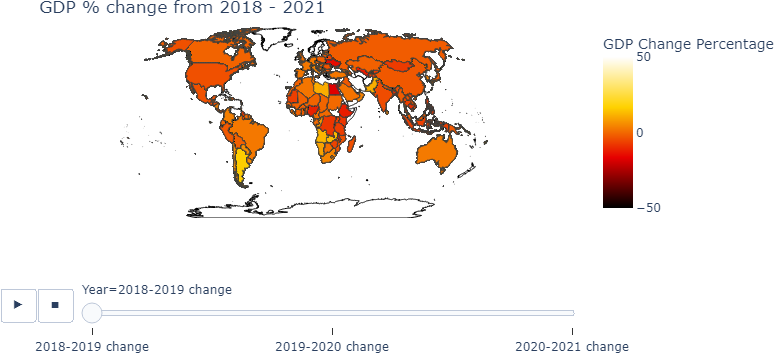

In [60]:
#Percent of GDP change for all countries from 2018 - 2021
gdp_change_percent = merged_data.melt(id_vars=['Country Name','Country Code'], 
                     value_vars=['2018-2019 change','2019-2020 change','2020-2021 change'], 
                     var_name='Year', value_name='GDP Change Percentage')

#Convert it into the appropriate datatype
gdp_change_percent['GDP Change Percentage'] = gdp_change_percent["GDP Change Percentage"].astype(float)

# Defining the mapbox plot
fig_map = px.choropleth(gdp_change_percent, locations='Country Code', hover_name="Country Name", 
                    color='GDP Change Percentage', 
                    scope='world', 
                    animation_frame ='Year', 
                    range_color=(-50,50),
                    #color_continuous_scale=px.colors.sequential.Viridis,
                    color_continuous_scale='Hot',
                    #color_continuous_scale=[(0, "red"), (1, "green")],  
                    projection="natural earth"
                    
                   )
# Adding Buttons 
fig_map.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

fig_map.update_geos(visible=False, resolution=50, scope="world",
    showcountries=True, countrycolor="Black")
# Defining an appropriate margin
fig_map.update_layout(margin={"r":0,"t":25,"l":0,"b":0}, 
                  title="GDP % change from 2018 - 2021",
                  mapbox_style='open-street-map')
fig_map.show()

## Inference
From the map, we can clearly see the drastic change in the gdp for most countries throughout the globe. We see the decline of the world economy during the COVID pandemic, and the slow and gradual rise in the aftermath. This can be attributed to the various fiscal policies taken by countries for curtailing the economic effect of the pandemic. We can also see some countries which performed quite well during the pandemic, and some that did not fare as well. We will analyze this further in the next part of our analysis.

## <font color = blue> 2) Analysing Policy Implementation and Termination Months and Years during pandemic

- ***Determine the count of policies implemented and terminated for every month during pandemic***
- ***Create an interactive line chart with the number of policies per month and year (Implemented and Terminated)***

In [61]:
# Creating a dataframe to analyse the policy termination date and the Number of Policies 
month_year_termination_data=merged_data[['Country Name','Policy Termination Month & Year']]
month_year_termination_data = month_year_termination_data.groupby('Policy Termination Month & Year').count()
month_year_termination_data.rename(columns={'Country Name':'Number of Policies'},inplace=True)
month_year_termination_data.reset_index(inplace=True)
month_year_termination_data

,Policy Termination Month & Year,Number of Policies
0,2020-03,1
1,2020-04,10
2,2020-05,23
3,2020-06,72
4,2020-07,22
5,2020-08,19
6,2020-09,131
7,2020-10,24
8,2020-11,5
9,2020-12,110


In [62]:
# Creating a dataframe to analyse the policy Implementation date and the Number of Policies
month_year_implementation_data=merged_data[['Country Name','Policy Implementation Month & Year']]
# Using groupby() and count()
month_year_implementation_data = month_year_implementation_data.groupby('Policy Implementation Month & Year').count()
month_year_implementation_data.rename(columns={'Country Name':'Number of Policies'},inplace=True)
month_year_implementation_data.reset_index(inplace=True)
month_year_implementation_data

,Policy Implementation Month & Year,Number of Policies
0,2020-02,31
1,2020-03,1208
2,2020-04,977
3,2020-05,404
4,2020-06,364
5,2020-07,175
6,2020-08,109
7,2020-09,128
8,2020-10,32
9,2020-11,25


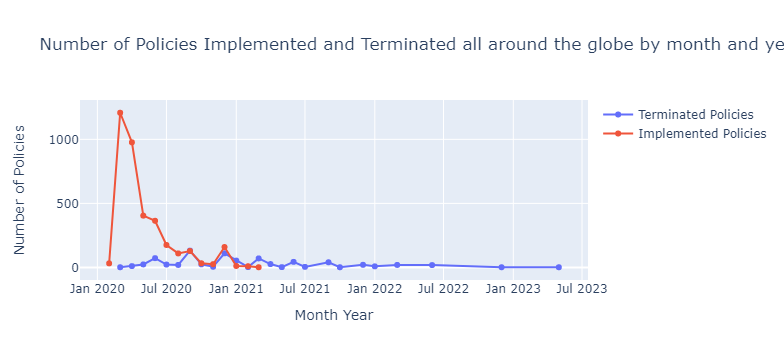

In [63]:
# Create a line chart to display the Policy termination and implementation data
import plotly.graph_objects as go

termination_implementation = go.Figure()

termination_implementation.add_trace(go.Scatter(x=month_year_termination_data['Policy Termination Month & Year'], y=month_year_termination_data['Number of Policies'], name="Terminated Policies", mode='lines+markers'))
termination_implementation.add_trace(go.Scatter(x=month_year_implementation_data['Policy Implementation Month & Year'], y=month_year_implementation_data['Number of Policies'], name="Implemented Policies", mode="lines+markers"))

termination_implementation.update_layout(
    title="Number of Policies Implemented and Terminated all around the globe by month and year ", xaxis_title="Month Year", yaxis_title="Number of Policies"
)
termination_implementation.show()

## Inference
While analyzing the implementation months and years, we can see that most of the economic policies were implemented at the start of the pandemic i.e. March 2020. There are also some countries who took the right measures looking at the sheer menace of the pandemic in the month of February 2020 itself. We can also see that there were countries who implemented many policies at the end of the year. This might be due to the fact that COIVD -19 pandemic was supposedly on the decline. 

Looking through the termination dates, we can see that some countries started terminating policies at the early stages from March 2020 through August 2020. This might be due to the fact that many of these policies were extremely short term. Also there could be a scenario where these policies might have failed and hence each country’s authoritative body wanted to abort these policies as soon as possible to save them from further trouble.

## Recommendations
Government and financial institutions implementing temporary policy measures to support borrowers are necessary for most major economies to support the weakest segment of their population and ease inflation pressures. Every country primarily took measures to support borrowers and reduce debt across the nation. Even though supporting borrowers had good social benefits, it causes a decrease in value of currency due to increase in supply of money without any corresponding increase in goods and services available for purchase. Hence, it should be ensured that these measures are temporary to curb further inflation.

## <font color = blue> 3) Analysing Income Level of best and worst performing countries

- ***Determining a dataframe with income level with best and worst performing countries in 2020-2021***
- ***Determining counts of Income Level among Best and worst performing countries***
- ***Create a bar chart for the counts of income level***

Now we look at the Income levels of best and worst performing countries and try to understand as to whether that played a part in the change in their GDP.

In [64]:
# Creating a new dataframe to analyse income level data of best performing countries
income_best=merged_data[['Country Name','Income Level','2020','2021','2020-2021 change']]
income_best=income_best[income_best['Country Name'].isin(best_gdp_2020_2021['Country Name'])]
income_best=income_best.sort_values(by='2020-2021 change',ascending=False).drop_duplicates(ignore_index=True)
income_best

,Country Name,Income Level,2020,2021,2020-2021 change
0,Zimbabwe,Lower middle income,1.805117e+10,2.621773e+10,45.241143
1,Haiti,Low income,1.450822e+10,2.094439e+10,44.362268
2,Guyana,Upper middle income,5.471257e+09,7.409180e+09,35.420078
3,Angola,Lower middle income,5.361907e+10,7.254699e+10,35.300713
4,Maldives,Upper middle income,3.742770e+09,4.889667e+09,30.642999
5,Azerbaijan,Upper middle income,4.269300e+10,5.462218e+10,27.941762
6,Ukraine,Lower middle income,1.566179e+11,2.000855e+11,27.753971
7,Sudan,Lower middle income,2.698756e+10,3.432606e+10,27.192137
8,Argentina,Upper middle income,3.895910e+11,4.914927e+11,26.156060
9,Chile,High income,2.527272e+11,3.170585e+11,25.454845


In [65]:
# Grouping by Income Level to calculate the frequency of income levels
income_best=income_best[['Country Name','Income Level']]
best_income_level = income_best.groupby('Income Level').count()
best_income_level.rename(columns={'Country Name':'Frequency of Income Levels'},inplace=True)
best_income_level

,Frequency of Income Levels
Income Level,
High income,1
Low income,1
Lower middle income,4
Upper middle income,4


In [66]:
# Creating a new dataframe to analyse income level data of worst performing countries
income_worst=merged_data[['Country Name','Income Level','2020','2021','2020-2021 change']]
income_worst=income_worst[income_worst['Country Name'].isin(worst_gdp_2020_2021['Country Name'])]
income_worst=income_worst.sort_values(by='2020-2021 change',ascending=True).drop_duplicates(ignore_index=True)
income_worst

,Country Name,Income Level,2020,2021,2020-2021 change
0,Lebanon,Upper middle income,2.594892e+10,1.807662e+10,-30.337649
1,Libya,Upper middle income,5.232022e+10,4.187958e+10,-19.955261
2,Myanmar,Lower middle income,7.893026e+10,6.506781e+10,-17.562908
3,Samoa,Upper middle income,8.071475e+08,7.883900e+08,-2.323932
4,Japan,High income,5.040108e+12,4.937422e+12,-2.037375
5,Jamaica,Upper middle income,1.381243e+10,1.363823e+10,-1.261140
6,"Micronesia, Fed. Sts.",Lower middle income,4.075159e+08,4.041780e+08,-0.819079
7,Lao PDR,Lower middle income,1.898180e+10,1.882715e+10,-0.814739
8,Suriname,Upper middle income,2.884248e+09,2.862132e+09,-0.766788
9,St. Kitts and Nevis,High income,9.809059e+08,9.761507e+08,-0.484779


In [67]:
# Grouping by Income Level to calculate the frequency of income levels
income_worst=income_worst[['Country Name','Income Level']]
income_level_worst = income_worst.groupby('Income Level').count()
income_level_worst.rename(columns={'Country Name':'Frequency of Income Levels'},inplace=True)
income_level_worst

,Frequency of Income Levels
Income Level,
High income,2
Lower middle income,3
Upper middle income,5


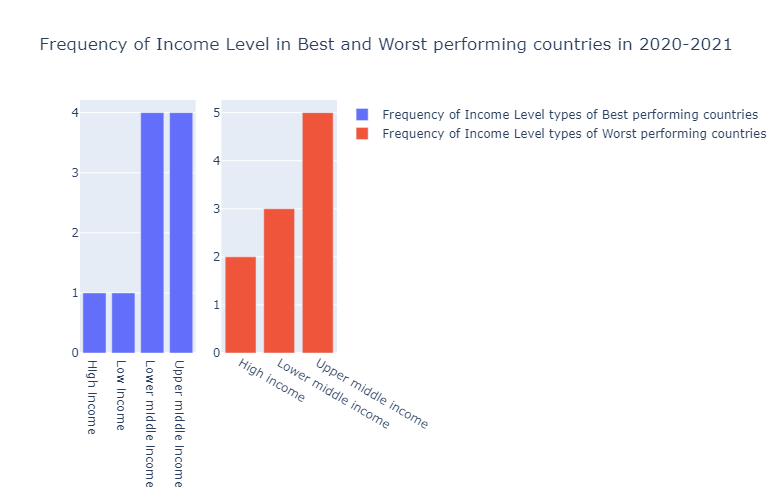

In [68]:
# Create a plot to display the income levels of the best and worst performing countries
from plotly.subplots import make_subplots
import plotly.graph_objects as go

sub = make_subplots(rows=1, cols=2)

sub.add_trace(go.Bar(x=best_income_level.index, y=best_income_level['Frequency of Income Levels'],name="Frequency of Income Level types of Best performing countries"),
    row=1, col=1
)

sub.add_trace(
    go.Bar(x=income_level_worst.index, y=income_level_worst['Frequency of Income Levels'],name="Frequency of Income Level types of Worst performing countries"),            
    row=1, col=2
)

sub.update_layout(height=500, width=1400, title_text="Frequency of Income Level in Best and Worst performing countries in 2020-2021")
sub.show()

## Inference
Haiti turned out to be a surprising find in the dataset. Despite being a low-income country, it had one of the highest positive changes in the GDP from 2020 to 2021. Haiti’s GDP improved by nearly 44% in 2021 from its GDP in 2020.

It is expected that high income countries would perform well during pandemic and implement better fiscal policies. However, from the graphs we can observe that there are 2 high income countries that performed poorly - Japan and St. Kitts and Nevis. It is also surprising to see Haiti, a low income country, to have one of the highest GDP change of over 44%.

## Recommendations
Every country has to be careful regardless of their respective Income levels. Hence 

## <font color=blue> 4) Analysing Authority of best and worst performing countries
    
- ***Determining a dataframe with Authority with best and worst performing countries in 2020-2021***
- ***Determining counts of Authority among Best and worst performing countries***
- ***Create a bar chart for the counts of Authority***

We try to undertand which are the best authority figures(for Financial Decisions). We try to understand whether they play a part in the countries performing well or not.

In [69]:
# Creating a new dataframe to analyse authority data of best performing countries
authority_best=merged_data[['Country Name','Authority','2020','2021','2020-2021 change']]
authority_best=authority_best[authority_best['Country Name'].isin(best_gdp_2020_2021['Country Name'])]
authority_best.drop_duplicates(inplace=True)
authority_best.sort_values(by='2020-2021 change',ascending=False,inplace=True)
authority_best

,Country Name,Authority,2020,2021,2020-2021 change
3126,Zimbabwe,Supervisory Agencies,1.805117e+10,2.621773e+10,45.241143
3125,Zimbabwe,Ministry Of Finance,1.805117e+10,2.621773e+10,45.241143
3113,Zimbabwe,Goverment,1.805117e+10,2.621773e+10,45.241143
3111,Zimbabwe,Central Bank,1.805117e+10,2.621773e+10,45.241143
2403,Haiti,Central Bank,1.450822e+10,2.094439e+10,44.362268
459,Guyana,Central Bank,5.471257e+09,7.409180e+09,35.420078
469,Guyana,Goverment,5.471257e+09,7.409180e+09,35.420078
3152,Angola,Goverment,5.361907e+10,7.254699e+10,35.300713
3151,Angola,Ministry Of Finance,5.361907e+10,7.254699e+10,35.300713
3148,Angola,Central Bank,5.361907e+10,7.254699e+10,35.300713


In [70]:
# Grouping by authority Level to calculate the frequency of authority levels
authority_best=authority_best[['Country Name','Authority']]
authority_best = authority_best.groupby('Authority').count()
authority_best.rename(columns={'Country Name':'Frequency of Authorities'},inplace=True)
authority_best.reset_index(inplace=True)
authority_best

,Authority,Frequency of Authorities
0,Central Bank,10
1,Goverment,6
2,Ministry Of Finance,5
3,No Information Available,1
4,Other,4
5,Supervisory Agencies,3


In [71]:
# Creating a new dataframe to analyse authority data of worst performing countries
authority_worst=merged_data[['Country Name','Authority','2020','2021','2020-2021 change']]
authority_worst=authority_worst[authority_worst['Country Name'].isin(worst_gdp_2020_2021['Country Name'])]
authority_worst.drop_duplicates(inplace=True)
authority_worst.sort_values(by='2020-2021 change',ascending=True,inplace=True)
authority_worst

,Country Name,Authority,2020,2021,2020-2021 change
3064,Lebanon,Goverment,2.594892e+10,1.807662e+10,-30.337649
3062,Lebanon,Central Bank,2.594892e+10,1.807662e+10,-30.337649
3137,Libya,Central Bank,5.232022e+10,4.187958e+10,-19.955261
1628,Myanmar,Central Bank,7.893026e+10,6.506781e+10,-17.562908
1629,Myanmar,Goverment,7.893026e+10,6.506781e+10,-17.562908
3139,Samoa,Goverment,8.071475e+08,7.883900e+08,-2.323932
3138,Samoa,Central Bank,8.071475e+08,7.883900e+08,-2.323932
252,Japan,Ministry Of Finance,5.040108e+12,4.937422e+12,-2.037375
274,Japan,Goverment,5.040108e+12,4.937422e+12,-2.037375
255,Japan,Central Bank,5.040108e+12,4.937422e+12,-2.037375


In [72]:
# Grouping by authority Level to calculate the frequency of authority levels
authority_worst=authority_worst[['Country Name','Authority']]
authority_worst = authority_worst.groupby('Authority').count()
authority_worst.rename(columns={'Country Name':'Frequency of Authorities'},inplace=True)
authority_worst.reset_index(inplace=True)
authority_worst

,Authority,Frequency of Authorities
0,Central Bank,9
1,Goverment,6
2,Ministry Of Finance,1
3,Other,1
4,Supervisory Agencies,1


In [73]:
# Merging both the dataframes to create a single one for analysis
authority=pd.merge(authority_best,authority_worst,on='Authority')
authority.rename(columns={'Frequency of Authorities_x':'Best Performing Countries','Frequency of Authorities_y':'Worst Performing Countries'},inplace=True)
authority

,Authority,Best Performing Countries,Worst Performing Countries
0,Central Bank,10,9
1,Goverment,6,6
2,Ministry Of Finance,5,1
3,Other,4,1
4,Supervisory Agencies,3,1


**We have the data for authority ready for our analysis**

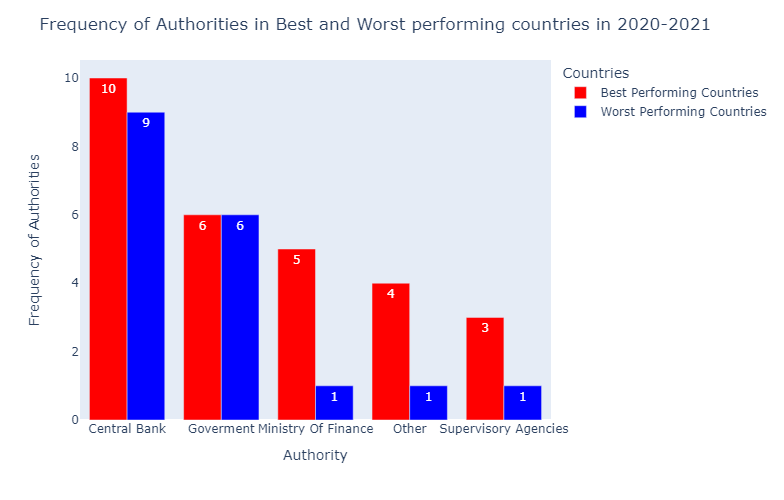

In [74]:
# Creating a bar plot to display the different authority levels of both the Best and Worst Performing Countries
import plotly.express as px
# df = px.data.iris()
fig000 = px.bar(authority, x="Authority", y=["Best Performing Countries","Worst Performing Countries"],barmode='group',text_auto=True,
               labels={
                     "value": "Frequency of Authorities",
                   "variable":"Countries"
                 },
               color_discrete_sequence=["red", "blue"],
               )
fig000.update_xaxes(showgrid=False)
fig000.update_yaxes(showgrid=False)

fig000.update_layout(height=500, width=1400, title_text="Frequency of Authorities in Best and Worst performing countries in 2020-2021")
fig000.show()

## Inference
We can see that both best and the worst performing countries had policies largely implemented by their central bank. This is followed by the government implemented policies, following by the Ministry of Finance. This helps us identify which institutions make most fiscal policies for the countries.

## <font color=blue> 5) Analysing Level 1 Policy Measures of best and worst performing countries
    
- ***Determining a dataframe with Level 1 Policy Measures with best and worst performing countries in 2020-2021***
- ***Determining counts of Level 1 Policy Measures among Best and worst performing countries***
- ***Create a scatter plot for the counts of Level 1 Policy Measures***

In [75]:
# Creating a dataframe to analyze the level 1 policies of the best performing countries
level1_best=merged_data[['Country Name','Level 1 policy measures','2020','2021','2020-2021 change']]
level1_best=level1_best[level1_best['Country Name'].isin(best_gdp_2020_2021['Country Name'])]
level1_best.drop_duplicates(inplace=True)
level1_best.sort_values(by='2020-2021 change',ascending=False,inplace=True)
level1_best.sort_values(by='Level 1 policy measures',inplace=True)
print("Frequency of Level 1 Policy Measures in top 10 countries having best gdp change:")
level1_best_counts=level1_best['Level 1 policy measures'].value_counts()
level1_best_counts

Frequency of Level 1 Policy Measures in top 10 countries having best gdp change:


Banking sector            10
Liquidity/funding          8
Payment systems            7
Financial Markets/NBFI     6
Insolvency                 1
Name: Level 1 policy measures, dtype: int64

In [77]:
# Creating a dataframe to analyze the level 1 policies of the worst performing countries
level1_worst=merged_data[['Country Name','Level 1 policy measures','2020','2021','2020-2021 change']]
level1_worst=level1_worst[level1_worst['Country Name'].isin(worst_gdp_2020_2021['Country Name'])]
level1_worst.drop_duplicates(inplace=True)
level1_worst.sort_values(by='2020-2021 change',ascending=False,inplace=True)
level1_worst.sort_values(by='Level 1 policy measures',inplace=True)
print("Frequency of Level 1 Policy Measures in bottom 10 countries having worst gdp change:")
level1_worst_counts=level1_worst['Level 1 policy measures'].value_counts()
level1_worst_counts

Frequency of Level 1 Policy Measures in bottom 10 countries having worst gdp change:


Banking sector            10
Liquidity/funding          6
Payment systems            3
Financial Markets/NBFI     2
Insolvency                 1
Name: Level 1 policy measures, dtype: int64

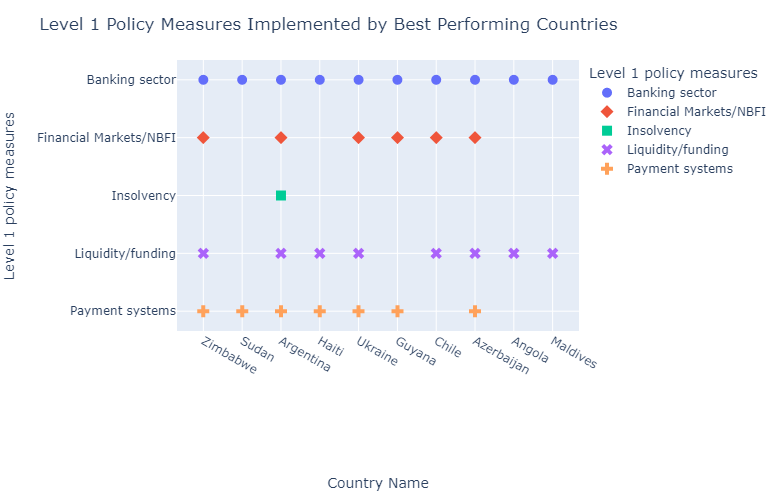

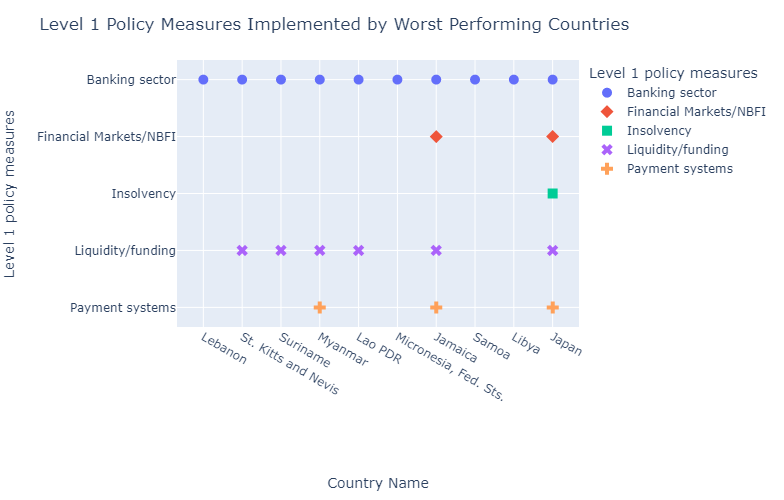

In [78]:
# Create a scatter plot for analysing the Level 1 policy measures
import plotly.express as px

level1_plot_best = px.scatter(level1_best, x='Country Name', y='Level 1 policy measures',
             color='Level 1 policy measures',symbol='Level 1 policy measures')
level1_plot_best.update_traces(marker_size=10)

level1_plot_best.update_xaxes(showgrid=True)
level1_plot_best.update_yaxes(showgrid=True)

level1_plot_best.update_layout(height=500, width=1400, title_text="Level 1 Policy Measures Implemented by Best Performing Countries")

level1_plot_best.show()

level1_plot_worst = px.scatter(level1_worst, x='Country Name', y='Level 1 policy measures',
             color='Level 1 policy measures',symbol='Level 1 policy measures')
level1_plot_worst.update_traces(marker_size=10)

level1_plot_worst.update_xaxes(showgrid=True)
level1_plot_worst.update_yaxes(showgrid=True)

level1_plot_worst.update_layout(height=500, width=1400, title_text="Level 1 Policy Measures Implemented by Worst Performing Countries")

level1_plot_worst.show()

## Inference
Negative economic growth (change in GDP) has become broad-based in many economies as they battle through the pandemic. The following observations can be made for the worst-performing countries, based on policy measures taken by the best-performing countries: 

`7 of the 10 best-performing countries` aggressively promoted investments while all of the best-performing countries took measures to protect their banks and other financial institutions. 
Only 2 of the 10 worst-performing countries took measures to promote investments and 8 of the 10 countries did not take any measures to protect their banks and other financial institutions.

`8 of the 10 best-performing countries` took measures to increase liquidity in their markets. High liquidity helps countries and their people meet their short-term debts. 
Only 5 of the 10 worst-performing countries took measures to increase liquidity in the market.

## Recommendations
Only 2 of the 10 worst-performing countries took measures to promote investments and 8 of the 10 countries did not take any measures to protect their banks and other financial institutions. Maintaining the stability of the country's financial institutions significantly improves confidence in the economic situation of a country. Financial sectors control a country's stability, so protecting these institutions should be a priority to improve a country’s economy.

## <font color=blue> 6) Analysing Level 2 Policy Measures of best and worst performing countries

- ***Redefining Level 2 Policy Measures based on Policy implementation Details***
- ***Determining a dataframe with Level 2 Policy Measures with best and worst performing countries in 2020-2021***
- ***Determining counts of Level 2 Policy Measures among Best and worst performing countries***
- ***Create a bar chart for the counts of Level 2 Policy Measures***

In [80]:
#list to recategorize data
support_borrowers = ['Other Payments','Support borrowers','Public debt management','Amending bankruptcy filing obligations','Policy rate']
market_movement = ['Operational continuity','Market functioning']
increasing_liquidity = ['Other liquidity','Consumer protection measures and ensuring availability and acceptance of cash','Easing regulatory requirements','Liquidity (incl FX)/ELA']
banking_protection = ['Crisis management','Prudential','NBFI']
digital_payments = ['Promoting and ensuring availability of digital payment mechanisms']
promoting_investments = ['Asset purchases','Integrity']


#add a new column
merged_data["Level 2 Recategorized policy measures"] = ''

#create a new column with recategorized data of Level 2 measures
merged_data["Level 2 Recategorized policy measures"] = np.where(merged_data["Level 2 policy measures"].isin(support_borrowers), "Support Borrowers", merged_data["Level 2 Recategorized policy measures"])
merged_data["Level 2 Recategorized policy measures"] = np.where(merged_data["Level 2 policy measures"].isin(market_movement), "Market Movement Measures", merged_data["Level 2 Recategorized policy measures"])
merged_data["Level 2 Recategorized policy measures"] = np.where(merged_data["Level 2 policy measures"].isin(increasing_liquidity), "Increasing Liquidity", merged_data["Level 2 Recategorized policy measures"])
merged_data["Level 2 Recategorized policy measures"] = np.where(merged_data["Level 2 policy measures"].isin(banking_protection), "Banking Protection", merged_data["Level 2 Recategorized policy measures"])
merged_data["Level 2 Recategorized policy measures"] = np.where(merged_data["Level 2 policy measures"].isin(promoting_investments), 'Promoting Investments', merged_data["Level 2 Recategorized policy measures"])
merged_data["Level 2 Recategorized policy measures"] = np.where(merged_data["Level 2 policy measures"].isin(digital_payments), 'Promoted Digital Payments', merged_data["Level 2 Recategorized policy measures"])

In [81]:
# Creating a dataframe to analyze the level 2 policies of the best performing countries
level2_best=merged_data[['Country Name','Level 2 Recategorized policy measures','2020','2021','2020-2021 change']]
level2_best=level2_best[level2_best['Country Name'].isin(best_gdp_2020_2021['Country Name'])]
level2_best.drop_duplicates(inplace=True)
level2_best.sort_values(by='2020-2021 change',ascending=False,inplace=True)
level2_best=level2_best[['Country Name','Level 2 Recategorized policy measures']]
level2_best.drop_duplicates(inplace=True)
level2_best.sort_values(by='Level 2 Recategorized policy measures',ascending=False,inplace=True)
print("Frequency of Level 2 Policy Measures in top 10 countries having best gdp change:")
level2_best_counts=level2_best['Level 2 Recategorized policy measures'].value_counts()
level2_best_counts

Frequency of authorities in top 10 countries having best gdp change:


Support Borrowers            10
Banking Protection            8
Promoting Investments         7
Increasing Liquidity          7
Market Movement Measures      6
Promoted Digital Payments     6
Name: Level 2 Recategorized policy measures, dtype: int64

In [83]:
# Creating a dataframe to analyze the level 2 policies of the worst performing countries
level2_worst=merged_data[['Country Name','Level 2 Recategorized policy measures','2020','2021','2020-2021 change']]
level2_worst=level2_worst[level2_worst['Country Name'].isin(worst_gdp_2020_2021['Country Name'])]
level2_worst.drop_duplicates(inplace=True)
level2_worst.sort_values(by='2020-2021 change',ascending=False,inplace=True)
level2_worst=level2_worst[['Country Name','Level 2 Recategorized policy measures']]
level2_worst.drop_duplicates(inplace=True)
level2_worst.sort_values(by='Level 2 Recategorized policy measures',ascending=False,inplace=True)
print("Frequency of Level 2 Policy Measures in bottom 10 countries having worst gdp change:")
level2_worst_counts=level2_worst['Level 2 Recategorized policy measures'].value_counts()
level2_worst_counts

Frequency of Level 2 Policy Measures in bottom 10 countries having worst gdp change:


Support Borrowers            10
Banking Protection            6
Increasing Liquidity          5
Market Movement Measures      3
Promoted Digital Payments     2
Promoting Investments         2
Name: Level 2 Recategorized policy measures, dtype: int64

In [2]:
# Create a bar plot for analysing the level 2 policy measures
import plotly.express as px

level2_plot_best = px.bar(level2_best, x='Country Name', y='Level 2 Recategorized policy measures',
             color='Level 2 Recategorized policy measures')
level2_plot_best.update_layout(yaxis_title=None,height=500, width=1400, title_text="Level 2 Policy Measures Implemented by Best Performing Countries",yaxis_visible=False, yaxis_showticklabels=False)
# level2_plot

level2_plot_worst = px.bar(level2_worst, x='Country Name', y='Level 2 Recategorized policy measures',
             color='Level 2 Recategorized policy measures')
level2_plot_worst.update_layout(yaxis_title=None,height=500, width=1400, title_text="Level 2 Policy Measures Implemented by Worst Performing Countries",yaxis_visible=False, yaxis_showticklabels=False)
# level2_plot
level2_plot_best.show()
level2_plot_worst.show()

NameError: name 'level2_best' is not defined

## Inference
The following observations can be made on policies implemented by the worst performing countries as compared to the policies implemented by the best performing countries: 

`7 of the 10 best-performing countries` actively promoted digital payments to prevent the spread of infection. 
`7 of the 10 worst-performing countries` did not take measures to promote digital payments. 


`6 of the 10 best-performing countries` took aggressive market movement measures to control the prices of goods in the short term (as seen from policy termination dates). 
`Only 3 of the 10 worst-performing countries` took market movement measures.

The highest positive change in GDP was in Zimbabwe with a 45% increase in GDP from 2020 to 2021. This was closely followed by Haiti at 44.36%. Guyana had the third-highest change at 35%. These countries took aggressive measures to protect their banks, support borrowers and increase liquidity in their market. Zimbabwe, the best performing country, took fiscal measures across all areas to ensure the stability of their financial institutions while supporting their population.

## Recommendations
It is likely that the COVID-19 crisis is accelerating the shift towards digitalization. With 60% of best performing countries actively promoting digital payment mechanisms, it is speculated that the shift towards digitalization is accelerated because of this crisis. Countries that want to perform better on a longer run should start investing more in their digital economy. If they don't start soon, it could lead to further aggravation in net wage and unemployment of their people. 